# Breast Cancer Prediction Model

## Importer les bibliothèques nécessaires.

In [56]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

In [5]:
os.getcwd()

'C:\\Users\\imadh\\breast cancer'

## Importer la base de données

In [59]:
data = pd.read_csv('breast_cancer_bd.csv')


**About this Dataset**  
This breast cancer database was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

**Attributes**  
Attributes 1 through 10 have been used to represent instances. Each instance has one of 2 possible classes: benign or malignant.

**Content**  

| **Attribute**                              | **Domain**          |
|--------------------------------------------|---------------------|
| 1. **Sample code number**                  | id number           |
| 2. **Clump Thickness**                     | 1 - 10              |
| 3. **Uniformity of Cell Size**             | 1 - 10              |
| 4. **Uniformity of Cell Shape**            | 1 - 10              |
| 5. **Marginal Adhesion**                   | 1 - 10              |
| 6. **Single Epithelial Cell Size**         | 1 - 10              |
| 7. **Bare Nuclei**                         | 1 - 10              |
| 8. **Bland Chromatin**                     | 1 - 10              |
| 9. **Normal Nucleoli**                     | 1 - 10              |
| 10. **Mitoses**                            | 1 - 10              |
| 11. **Class** (2 for benign, 4 for malignant) |                     |

**Class Distribution**  
- **Benign:** <span style="color:blue;">458 (65.5%)</span>  
- **Malignant:** <span style="color:red;">241 (34.5%)</span>  


In [16]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


- **Clump Thickness**: Refers to the thickness of cell clusters. Higher values may indicate the presence of cancerous cells as they tend to form clumps.

- **Uniformity of Cell Size**: Cancerous cells often vary in size. This feature measures how uniform the sizes of the cells are.

- **Uniformity of Cell Shape**: Similar to cell size, cancerous cells often vary in shape. This feature assesses the consistency in the shape of the cells.

- **Marginal Adhesion**: In healthy tissue, cells stick to each other. A decrease in adhesion can be a sign of malignancy.

- **Single Epithelial Cell Size**: Measures the size of individual epithelial cells, which tend to be larger in the presence of cancer.

- **Bare Nuclei**: Refers to the presence of nuclei without the surrounding cytoplasm. Bare nuclei are more commonly found in malignant tumors.

- **Bland Chromatin**: Chromatin is the material that makes up chromosomes. In cancerous cells, chromatin can appear less structured or more uniform.

- **Normal Nucleoli**: Nucleoli are small, dense structures within the nucleus. Larger or more numerous nucleoli are often a sign of cancer.

- **Mitoses**: Refers to cell division. A higher number of mitoses is usually indicative of rapid cell growth, which can signal cancer.


## Preprocessing

In [11]:
print("les diemsions de la BDD : ", data.shape)
print("\n\nla liste des variables : \n", data.columns) 
print("\n\nles types de variables : \n", data.dtypes)

les diemsions de la BDD :  (699, 11)


la liste des variables : 
 Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


les types de variables : 
 Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [60]:
data = data.drop('Sample code number', axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [18]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [61]:
print(data['Bare Nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [62]:
data = data.replace('?', np.nan)

data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [29]:
print(data.isnull().sum())

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


<Axes: >

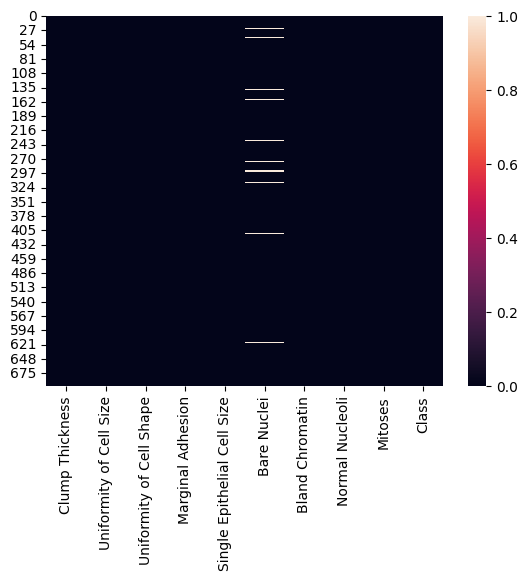

In [36]:
sns.heatmap(data.isnull())

In [63]:
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())

In [31]:
print(data.isnull().sum())

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


<Axes: >

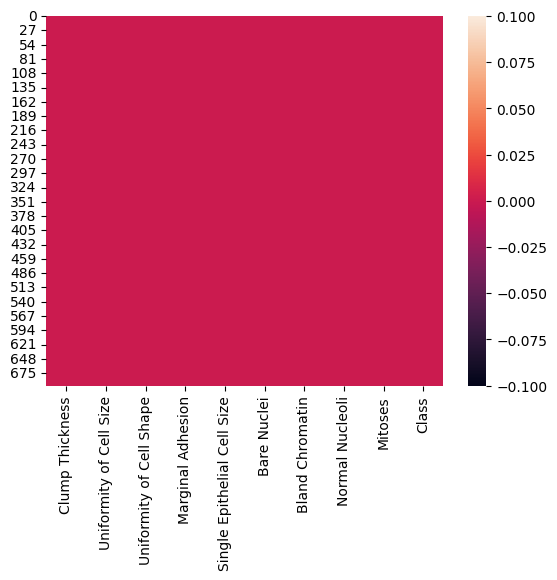

In [38]:
sns.heatmap(data.isnull())

<Axes: >

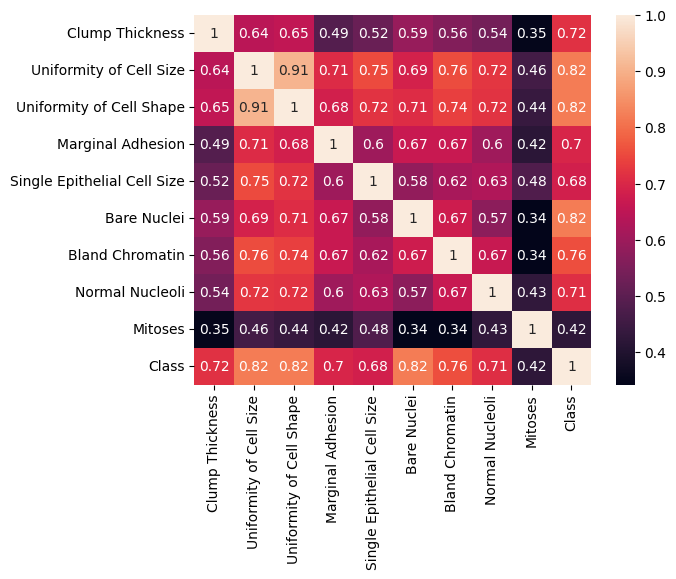

In [39]:
sns.heatmap(data.corr(),annot=True)

#### Interpretation of the Correlation Matrix

The correlation matrix provides insights into the relationships between various attributes related to breast cancer data. Each value in the matrix indicates the strength and direction of the linear relationship between pairs of attributes, ranging from -1 to 1. A value close to 1 implies a strong positive correlation, while a value close to -1 implies a strong negative correlation. A value around 0 indicates no correlation.

###### Key Observations

- **Clump Thickness**: 
  - **Highest Correlation**: Class (0.716) 
  - This suggests that as the clump thickness increases, the likelihood of a malignant class also increases.
  
- **Uniformity of Cell Size**: 
  - **Highest Correlation**: Uniformity of Cell Shape (0.907) 
  - This indicates a very strong relationship between cell size uniformity and cell shape uniformity, suggesting that changes in one may reflect changes in the other.

- **Uniformity of Cell Shape**: 
  - **Highest Correlation**: Uniformity of Cell Size (0.907) 
  - Similar to above, the relationship with cell size reinforces the importance of uniformity in both dimensions for assessing malignancy risk.

- **Marginal Adhesion**: 
  - **Highest Correlation**: Single Epithelial Cell Size (0.600) 
  - This indicates that lower adhesion may correlate with larger epithelial cell sizes, which can be a marker for malignancy.

- **Bare Nuclei**: 
  - **Highest Correlation**: Class (0.819) 
  - The strong correlation implies that the presence of bare nuclei is closely linked to malignant classifications, indicating their potential significance in diagnosis.

- **Bland Chromatin**: 
  - **Highest Correlation**: Class (0.757) 
  - Similar to bare nuclei, bland chromatin is also a significant indicator of the likelihood of malignancy.

- **Normal Nucleoli**: 
  - **Highest Correlation**: Class (0.712) 
  - The presence of normal nucleoli is another relevant feature that indicates the potential for malignant tumors.

- **Mitoses**: 
  - **Correlation with Class**: (0.423) 
  - While there is a positive correlation, it is relatively weaker compared to other attributes, indicating that mitotic activity is not as strong an indicator of malignancy as other features.

## Conclusion

Overall, attributes like **Bare Nuclei**, **Class**, and **Bland Chromatin** show the strongest correlations, suggesting that these features are crucial in distinguishing between benign and malignant cases. The high correlations among uniformity measurements further emphasize the importance of assessing these characteristics together when analyzing breast cancer data.


## Séparer les variables en explicatives et à expliquer:

In [64]:
X = data.drop('Class', axis=1)
y = data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Entrainer les models

In [65]:
# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'LASSO Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Logitic Regression': LogisticRegression(),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R^2 score: {score:.4f}")

Linear Regression R^2 score: 0.8262
Ridge Regression R^2 score: 0.8262
LASSO Regression R^2 score: -0.0039
Elastic Net R^2 score: 0.3963
Random Forest R^2 score: 0.8521
Logitic Regression R^2 score: 0.8363


In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R^2 Score:", best_score)

# Step 7: Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_score = r2_score(y_test, y_pred)

print("Test Set R^2 Score:", test_score)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation R^2 Score: 0.8570074938276008
Test Set R^2 Score: 0.8813393621409209


In [69]:
joblib.dump(best_rf, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']